# Importing modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.utils import np_utils
np.random.seed(2018)
% matplotlib inline

Using Theano backend.


# Loading MNIST dataset

In [2]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print ("Number of training samples:",train_features.shape[0])
print ("Number of test samples:",test_features.shape[0])
print ("Image rows:",train_features.shape[1])
print ("Image columns:",train_features.shape[2])
print ("Number of classes:",num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


# Show Examples from Each Class

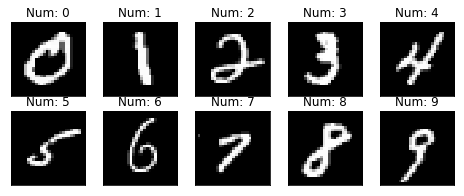

In [3]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

# Preprocessing data


In [4]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Consider batch_size=100 and epochs=10

In [5]:
batch_size = 100
epochs = 10

# First model: 
- 1 hidden layer with 512 nodes 
- Hidden layer uses tanh activation
- Output layer uses sigmoid activation

In [6]:
#Initialise model
model = Sequential()
#Add input and hidden layer
model.add(Dense(512, activation='tanh', input_dim = num_input_nodes))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [7]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [9]:
model_info = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.6371 - acc: 0.8182 - val_loss: 0.3503 - val_acc: 0.9080
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.3188 - acc: 0.9125 - val_loss: 0.2678 - val_acc: 0.9264
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.2655 - acc: 0.9254 - val_loss: 0.2411 - val_acc: 0.9319
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.2396 - acc: 0.9330 - val_loss: 0.2288 - val_acc: 0.9351
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.2161 - acc: 0.9389 - val_loss: 0.2127 - val_acc: 0.9390
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.2010 - acc: 0.9433 - val_loss: 0.1948 - val_acc: 0.9437
Epoch 7/10
60000/60000 [==============================] - 4s - loss: 0.1853 - acc: 0.9473 - val_loss: 0.1815 - val_acc: 0.9485
Epoch 8/10
60000/60000 [==============================] - 4s 

# Second Model:
- 2 hidden layer with 512 nodes with tanh activation
- Output layer uses sigmoid activation

In [10]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='tanh'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [11]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [13]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s - loss: 0.6965 - acc: 0.8236 - val_loss: 0.3540 - val_acc: 0.9086
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.3161 - acc: 0.9144 - val_loss: 0.2791 - val_acc: 0.9255
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.2590 - acc: 0.9280 - val_loss: 0.2379 - val_acc: 0.9336
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.2285 - acc: 0.9360 - val_loss: 0.2163 - val_acc: 0.9390
Epoch 5/10
60000/60000 [==============================] - 8s - loss: 0.2079 - acc: 0.9404 - val_loss: 0.2066 - val_acc: 0.9431
Epoch 6/10
60000/60000 [==============================] - 8s - loss: 0.1988 - acc: 0.9437 - val_loss: 0.1942 - val_acc: 0.9441
Epoch 7/10
60000/60000 [==============================] - 8s - loss: 0.1830 - acc: 0.9480 - val_loss: 0.1824 - val_acc: 0.9481
Epoch 8/10
60000/60000 [==============================] - 8s 

# Third Model:
- 1 hidden layer with 512 nodes with sigmoid activation
- Output layer uses softmax activation





In [14]:
#Initialise model
model = Sequential()
#Add input and hidden layer
model.add(Dense(512, activation='sigmoid', input_dim = num_input_nodes))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [15]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [17]:
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s - loss: 0.6506 - acc: 0.8337 - val_loss: 0.3719 - val_acc: 0.9040
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.3319 - acc: 0.9114 - val_loss: 0.2945 - val_acc: 0.9208
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.2728 - acc: 0.9256 - val_loss: 0.2558 - val_acc: 0.9305
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.2383 - acc: 0.9350 - val_loss: 0.2304 - val_acc: 0.9361
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.2132 - acc: 0.9417 - val_loss: 0.2137 - val_acc: 0.9415
Epoch 6/10
60000/60000 [==============================] - 11s - loss: 0.1944 - acc: 0.9473 - val_loss: 0.2004 - val_acc: 0.9430
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.1788 - acc: 0.9515 - val_loss: 0.1890 - val_acc: 0.9458
Epoch 8/10
60000/60000 [==============================

# Fourth Model:
- 2 hidden layer with 512 nodes with sigmoid activation
- Output layer uses softmax activation

In [18]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='sigmoid', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='sigmoid'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [19]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [21]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s - loss: 1.4236 - acc: 0.7154 - val_loss: 0.8506 - val_acc: 0.8388
Epoch 2/10
60000/60000 [==============================] - 19s - loss: 0.6622 - acc: 0.8645 - val_loss: 0.5177 - val_acc: 0.8835
Epoch 3/10
60000/60000 [==============================] - 19s - loss: 0.4607 - acc: 0.8914 - val_loss: 0.3995 - val_acc: 0.9015
Epoch 4/10
60000/60000 [==============================] - 19s - loss: 0.3759 - acc: 0.9063 - val_loss: 0.3430 - val_acc: 0.9136
Epoch 5/10
60000/60000 [==============================] - 18s - loss: 0.3271 - acc: 0.9144 - val_loss: 0.3088 - val_acc: 0.9180
Epoch 6/10
60000/60000 [==============================] - 18s - loss: 0.2950 - acc: 0.9211 - val_loss: 0.2850 - val_acc: 0.9221
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.2708 - acc: 0.9270 - val_loss: 0.2671 - val_acc: 0.9280
Epoch 8/10
60000/60000 [==============================

# Fifth Model:
- 1 hidden layer with 512 nodes with sigmoid activation
- Output layer uses sigmoid activation

In [22]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='sigmoid', input_dim = num_input_nodes))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [23]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [25]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s - loss: 0.8293 - acc: 0.7925 - val_loss: 0.4053 - val_acc: 0.9039
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.3609 - acc: 0.9071 - val_loss: 0.3084 - val_acc: 0.9229
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.2883 - acc: 0.9232 - val_loss: 0.2631 - val_acc: 0.9315
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.2488 - acc: 0.9336 - val_loss: 0.2361 - val_acc: 0.9369
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.2225 - acc: 0.9398 - val_loss: 0.2160 - val_acc: 0.9420
Epoch 6/10
60000/60000 [==============================] - 11s - loss: 0.2018 - acc: 0.9454 - val_loss: 0.1998 - val_acc: 0.9446
Epoch 7/10
60000/60000 [==============================] - 11s - loss: 0.1854 - acc: 0.9499 - val_loss: 0.1902 - val_acc: 0.9475
Epoch 8/10
60000/60000 [==============================

# Sixth Model:
- 2 hidden layer with 512 nodes with sigmoid activation
- Output layer uses sigmoid activation

In [26]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='sigmoid', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='sigmoid'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [27]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [29]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s - loss: 1.7430 - acc: 0.6150 - val_loss: 1.0830 - val_acc: 0.8173
Epoch 2/10
60000/60000 [==============================] - 17s - loss: 0.8011 - acc: 0.8472 - val_loss: 0.5951 - val_acc: 0.8807
Epoch 3/10
60000/60000 [==============================] - 18s - loss: 0.5170 - acc: 0.8863 - val_loss: 0.4362 - val_acc: 0.8999
Epoch 4/10
60000/60000 [==============================] - 19s - loss: 0.4046 - acc: 0.9022 - val_loss: 0.3631 - val_acc: 0.9102
Epoch 5/10
60000/60000 [==============================] - 19s - loss: 0.3443 - acc: 0.9130 - val_loss: 0.3200 - val_acc: 0.9166
Epoch 6/10
60000/60000 [==============================] - 17s - loss: 0.3063 - acc: 0.9197 - val_loss: 0.2939 - val_acc: 0.9235
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.2793 - acc: 0.9251 - val_loss: 0.2720 - val_acc: 0.9276
Epoch 8/10
60000/60000 [==============================

## Choosing the best model: 2 hidden layers with tanh and output layer with sigmoid activation and increasing the number of epochs to 20

In [30]:
epochs=20

In [31]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='tanh'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [32]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [34]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s - loss: 0.6769 - acc: 0.8261 - val_loss: 0.3501 - val_acc: 0.9089
Epoch 2/20
60000/60000 [==============================] - 8s - loss: 0.3107 - acc: 0.9166 - val_loss: 0.2735 - val_acc: 0.9253
Epoch 3/20
60000/60000 [==============================] - 8s - loss: 0.2552 - acc: 0.9297 - val_loss: 0.2375 - val_acc: 0.9344
Epoch 4/20
60000/60000 [==============================] - 8s - loss: 0.2251 - acc: 0.9381 - val_loss: 0.2133 - val_acc: 0.9397
Epoch 5/20
60000/60000 [==============================] - 8s - loss: 0.2059 - acc: 0.9423 - val_loss: 0.2035 - val_acc: 0.9411
Epoch 6/20
60000/60000 [==============================] - 9s - loss: 0.1905 - acc: 0.9468 - val_loss: 0.1862 - val_acc: 0.9466
Epoch 7/20
60000/60000 [==============================] - 8s - loss: 0.1762 - acc: 0.9500 - val_loss: 0.1822 - val_acc: 0.9455
Epoch 8/20
60000/60000 [==============================] - 8s 

## Observation
Increasing the number of epochs gave us better accuracy

## Trying different batch size

In [35]:
batch_size=200

In [36]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='tanh'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [37]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [39]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s - loss: 0.9059 - acc: 0.7670 - val_loss: 0.4429 - val_acc: 0.8928
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.3878 - acc: 0.8983 - val_loss: 0.3293 - val_acc: 0.9161
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.3083 - acc: 0.9167 - val_loss: 0.2780 - val_acc: 0.9272
Epoch 4/20
60000/60000 [==============================] - 8s - loss: 0.2659 - acc: 0.9276 - val_loss: 0.2545 - val_acc: 0.9314
Epoch 5/20
60000/60000 [==============================] - 8s - loss: 0.2392 - acc: 0.9338 - val_loss: 0.2293 - val_acc: 0.9345
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.2147 - acc: 0.9397 - val_loss: 0.2142 - val_acc: 0.9392
Epoch 7/20
60000/60000 [==============================] - 8s - loss: 0.2008 - acc: 0.9437 - val_loss: 0.2046 - val_acc: 0.9412
Epoch 8/20
60000/60000 [==============================] - 8s 

## Observation
Increasing batch size increased accuracy.

In [45]:
batch_size=200

# Using optimiser sgd with momentum

In [46]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='tanh'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [47]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [48]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser with momentum
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=False),
              metrics=['accuracy'])

In [49]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.5374 - acc: 0.8511 - val_loss: 0.4042 - val_acc: 0.8830
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.4036 - acc: 0.8795 - val_loss: 0.4159 - val_acc: 0.8752
Epoch 3/20
60000/60000 [==============================] - 8s - loss: 0.4200 - acc: 0.8707 - val_loss: 0.4208 - val_acc: 0.8678
Epoch 4/20
60000/60000 [==============================] - 7s - loss: 0.4312 - acc: 0.8627 - val_loss: 0.3850 - val_acc: 0.8849
Epoch 5/20
60000/60000 [==============================] - 8s - loss: 0.3901 - acc: 0.8775 - val_loss: 0.3676 - val_acc: 0.8883
Epoch 6/20
60000/60000 [==============================] - 8s - loss: 0.3726 - acc: 0.8831 - val_loss: 0.3325 - val_acc: 0.8986
Epoch 7/20
60000/60000 [==============================] - 8s - loss: 0.3585 - acc: 0.8864 - val_loss: 0.4049 - val_acc: 0.8661
Epoch 8/20
60000/60000 [==============================] - 8s 

## Using optimiser: Adagrad 

In [50]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_dim = num_input_nodes))
#Add 2nd hidden layer
model.add(Dense(512, activation='tanh'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [51]:
#Compiling model: Using categorical crossentropy loss function and adagrad optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

In [52]:
#Training model
history = model.fit(train_features, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_features, test_labels))
#Evaluating model
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s - loss: 0.5208 - acc: 0.8313 - val_loss: 0.2306 - val_acc: 0.9319
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 0.2194 - acc: 0.9329 - val_loss: 0.1994 - val_acc: 0.9365
Epoch 3/20
60000/60000 [==============================] - 10s - loss: 0.1766 - acc: 0.9468 - val_loss: 0.1692 - val_acc: 0.9477
Epoch 4/20
60000/60000 [==============================] - 10s - loss: 0.1498 - acc: 0.9547 - val_loss: 0.1489 - val_acc: 0.9524
Epoch 5/20
60000/60000 [==============================] - 10s - loss: 0.1347 - acc: 0.9593 - val_loss: 0.1447 - val_acc: 0.9553
Epoch 6/20
60000/60000 [==============================] - 10s - loss: 0.1224 - acc: 0.9634 - val_loss: 0.1366 - val_acc: 0.9580
Epoch 7/20
60000/60000 [==============================] - 11s - loss: 0.1127 - acc: 0.9655 - val_loss: 0.1241 - val_acc: 0.9624
Epoch 8/20
60000/60000 [==============================]

# Observation
Adagrad optimiser gives us the best accuracy of 97.11%

## Plotting loss and accuracy of this model

In [53]:
#Function to plot loss and accuracy
def plot_model(model_info):
    fig, axis = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    # summarize history for loss
    axis[1].plot(range(1,len(model_info.history['loss'])+1),model_info.history['loss'])
    axis[1].plot(range(1,len(model_info.history['val_loss'])+1),model_info.history['val_loss'])
    axis[1].set_title('Model Loss')
    axis[1].set_ylabel('Loss')
    axis[1].set_xlabel('Epoch')
    axis[1].set_xticks(np.arange(1,len(model_info.history['loss'])+1),len(model_info.history['loss'])/10)
    axis[1].legend(['train', 'val'], loc='best')
    axis[0].plot(range(1,len(model_info.history['acc'])+1),model_info.history['acc'])
    axis[0].plot(range(1,len(model_info.history['val_acc'])+1),model_info.history['val_acc'])
    axis[0].set_title('Model Accuracy')
    axis[0].set_ylabel('Accuracy')
    axis[0].set_xlabel('Epoch')
    axis[0].set_xticks(np.arange(1,len(model_info.history['acc'])+1),len(model_info.history['acc'])/10)
    axis[0].legend(['train', 'val'], loc='best')
    plt.show()

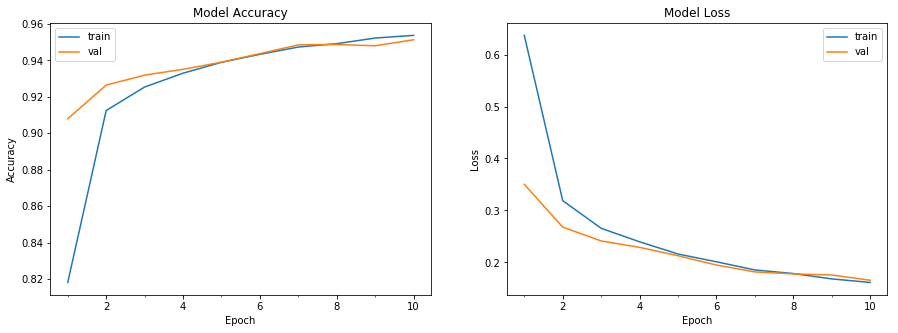

In [54]:
plot_model(model_info)

# Observation
The best result was obtained from the model with
2 hidden layers of 512 nodes each with 'tanh' activation and an output layer with 'sigmoid' activation
The Adagrad optimiser gave us the best result with an accuracy of 97.11%